# Support Vector Machine

**Support Vector Machine** is a supervised machine learning algorithm used for **classification** and **regression** analysis. 

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a **hyperplane**.

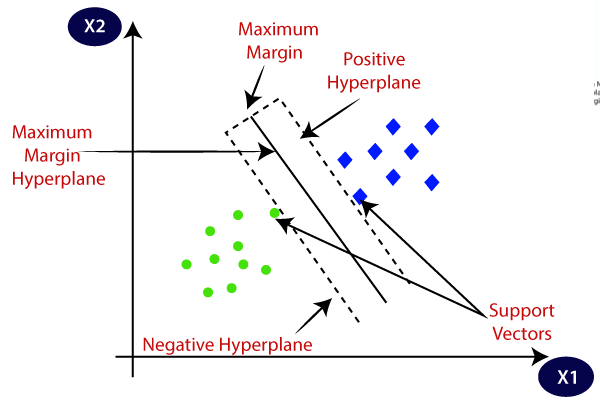

A **Kernel function** is a mathematical method used to transform data into a format that can be more easily processed by a machine learning algorithm, specifically in Support Vector Machines (SVMs). The term "kernel" refers to a set of mathematical functions that are used to manipulate the data. The kernel function transforms the training data in such a way that a non-linear decision boundary in the original feature space can be transformed to a linear equation in a higher-dimensional feature space. 

**Major Kernel Functions** :-

**Linear Kernel**: It is used when data is linearly separable.

**Polynomial Kernel**: It represents the similarity of vectors in the training set of data in a feature space over polynomials of the original variables used in the kernel.

**Sigmoid Kernel**: It is equivalent to a two-layer, perceptron model of the neural network, which is used as an activation function for artificial neurons.

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp

## 2. Importing Data

In [2]:
data= pd.read_csv('Datasets/data.csv')

## 3. Visualizing Dataset

We shall now examine **Malignant tumor** and **Benign tumor** by examining their **average radius** and **texture**

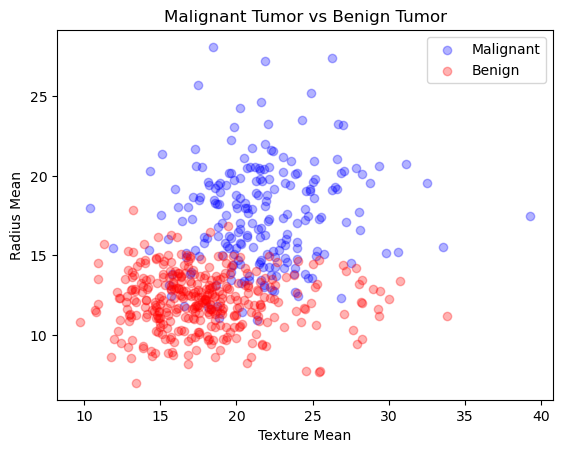

In [3]:
M=data[data.diagnosis=='M']
B=data[data.diagnosis=='B']

mtp.title("Malignant Tumor vs Benign Tumor")
mtp.xlabel("Texture Mean")
mtp.ylabel("Radius Mean")

mtp.scatter( M.texture_mean, M.radius_mean, color = "Blue", label = "Malignant", alpha = 0.3)
mtp.scatter(B.texture_mean, B.radius_mean,  color = "Red", label = "Benign", alpha = 0.3)
mtp.legend()
mtp.show()

## 4. Data Cleaning

In [4]:
# Remove duplicate rows
data = data.drop_duplicates()
#Remove unnecessary columns
data = data.drop(columns=["id","Unnamed: 32"])

## 5. Data Preprocessing

**Malignant tumors** will be assigned a value of '1' and **Benign tumors** will be assigned a value of '0'.

In [5]:
data.diagnosis = [1 if i == "M" else 0 for i in data.diagnosis]

Now, Split the Dataframe into x and y components. x includes all independent predictor factors and y provides the diagnosis.values

In [6]:
x = data.drop(["diagnosis"], axis = 1)
y = data.diagnosis.values

###  Data Normalization

**Normalize** the data to maximize the **Model's Efficiency**

In [7]:
x = (x - np.min(x,axis=0)) / (np.max(x,axis=0) - np.min(x,axis=0))

## 6. Data Splitting

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

### Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test) 

## 7. Training Model

## 7.1 Linear SVM Model

In [10]:
from sklearn import svm

svm1 = svm.SVC(kernel='linear')
svm1.fit(x_train, y_train)

y_pred1 = svm1.predict(x_test)

## 7.2 Polynomial SVM Model

In [11]:
from sklearn import svm

svm2 = svm.SVC(kernel='poly')
svm2.fit(x_train, y_train)

y_pred2 = svm2.predict(x_test)

## 7.3 Sigmoid SVM Model

In [12]:
from sklearn import svm

svm3 = svm.SVC(kernel='sigmoid')
svm3.fit(x_train, y_train)

y_pred3 = svm3.predict(x_test)

## 8. Visualization

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

## Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (linear kernel)')

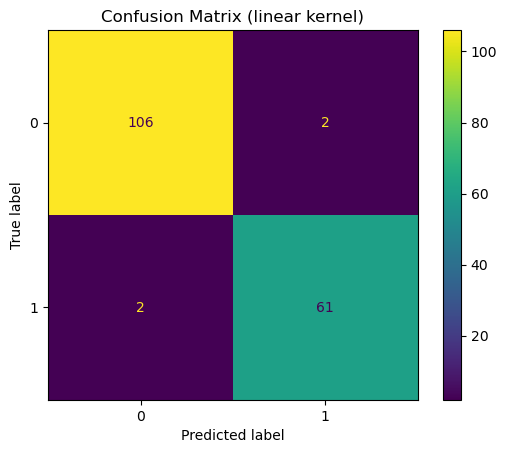

In [14]:
# Plot confusion matrix for linear SVM
cm1 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
ax = cm1.ax_
ax.set_title("Confusion Matrix (linear kernel)")

Text(0.5, 1.0, 'Confusion Matrix (Polynomial kernel)')

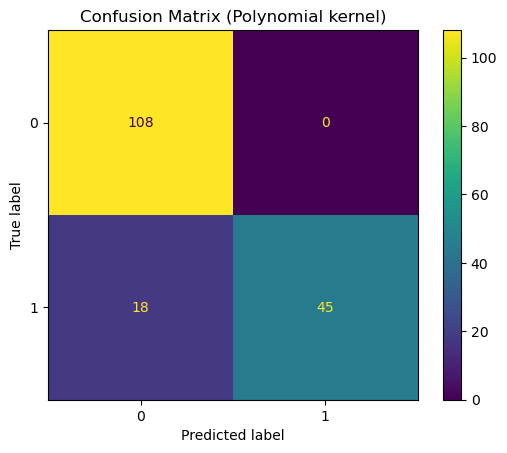

In [15]:
# Plot confusion matrix for Polynomial SVM
cm2 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred2)
ax = cm2.ax_
ax.set_title("Confusion Matrix (Polynomial kernel)")

Text(0.5, 1.0, 'Confusion Matrix (Sigmoid kernel)')

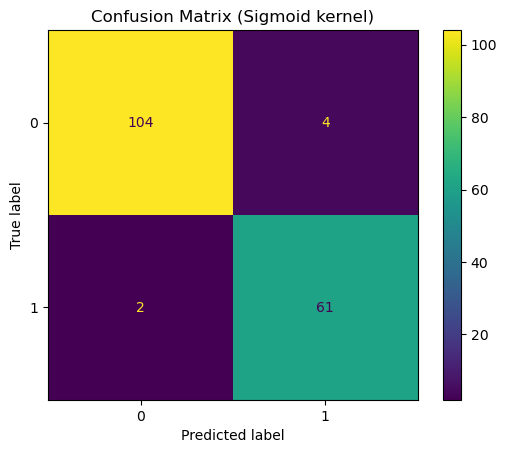

In [16]:
# Plot confusion matrix for Sigmoid SVM
cm3 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred3)
ax = cm3.ax_
ax.set_title("Confusion Matrix (Sigmoid kernel)")

## ROC Curve

Text(0.5, 1.0, 'ROC Curve (linear kernel)')

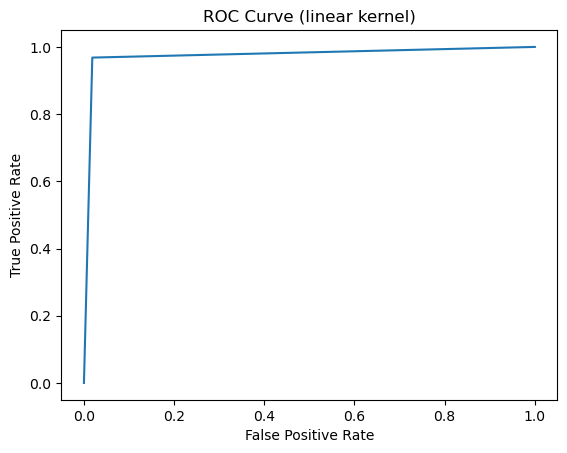

In [17]:
# Plot ROC curve for linear SVM
fpr1, tpr1, _ = roc_curve(y_test, y_pred1)
roc_display1 = RocCurveDisplay(fpr=fpr1, tpr=tpr1)
roc_display1.plot()
mtp.title("ROC Curve (linear kernel)")

Text(0.5, 1.0, 'ROC Curve (polynomial kernel)')

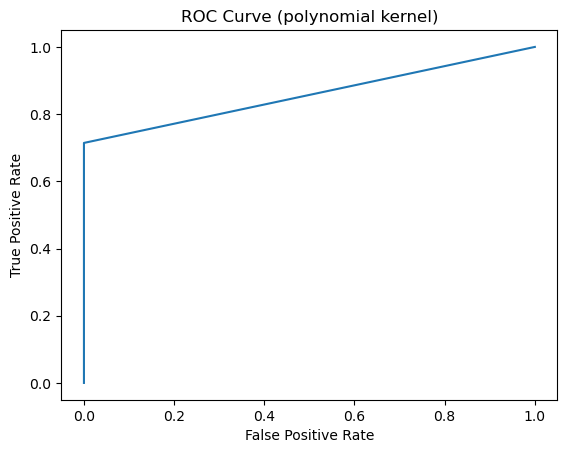

In [18]:
# Plot ROC curve for Polynomial SVM
fpr2, tpr2, _ = roc_curve(y_test, y_pred2)
roc_display2 = RocCurveDisplay(fpr=fpr2, tpr=tpr2)
roc_display2.plot()
mtp.title("ROC Curve (polynomial kernel)")

Text(0.5, 1.0, 'ROC Curve (sigmoid kernel)')

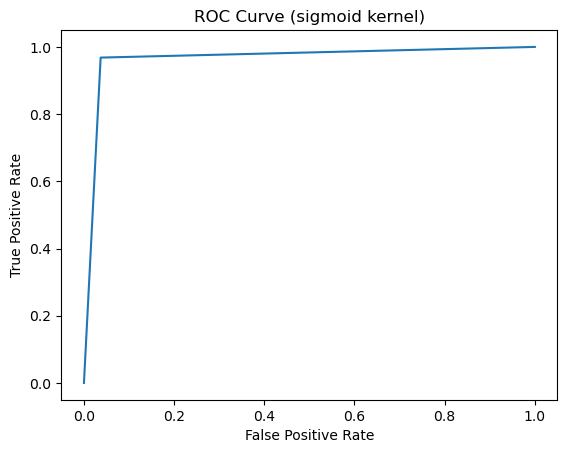

In [19]:
# Plot ROC curve for Sigmoid SVM
fpr3, tpr3, _ = roc_curve(y_test, y_pred3)
roc_display3 = RocCurveDisplay(fpr=fpr3, tpr=tpr3)
roc_display3.plot()
mtp.title("ROC Curve (sigmoid kernel)")

## 9. Evaluation of Performance

### Accuracy

It measures the proportion of correct predictions made by the model among all predictions made.

In [20]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy3 = accuracy_score(y_test, y_pred3)

print("Accuracy for Linear SVM: {:.4f}".format(accuracy1))
print("Accuracy for Polynomial SVM: {:.4f}".format(accuracy2))
print("Accuracy for Sigmoid SVM: {:.4f}".format(accuracy3))

Accuracy for Linear SVM: 0.9766
Accuracy for Polynomial SVM: 0.8947
Accuracy for Sigmoid SVM: 0.9649


### Precision

It measures the proportion of true positive predictions among all positive predictions made by the model.

In [21]:
from sklearn.metrics import precision_score

precision1 = precision_score(y_test, y_pred1)
precision2 = precision_score(y_test, y_pred2)
precision3 = precision_score(y_test, y_pred3)

print("Precision for Linear SVM: {:.4f}".format(precision1))
print("Precision for Polynomial SVM: {:.4f}".format(precision2))
print("Precision for Sigmoid SVM: {:.4f}".format(precision3))

Precision for Linear SVM: 0.9683
Precision for Polynomial SVM: 1.0000
Precision for Sigmoid SVM: 0.9385


### Recall

It measures the proportion of true positive predictions among all actual positive instances in the dataset.

In [22]:
from sklearn.metrics import recall_score

recall1 = recall_score(y_test, y_pred1)
recall2 = recall_score(y_test, y_pred2)
recall3 = recall_score(y_test, y_pred3)

print("Recall for Linear SVM: {:.4f}".format(recall1))
print("Recall for Polynomial SVM: {:.4f}".format(recall2))
print("Recall for Sigmoid SVM: {:.4f}".format(recall3))

Recall for Linear SVM: 0.9683
Recall for Polynomial SVM: 0.7143
Recall for Sigmoid SVM: 0.9683
